## Importing libraries and loading dataframe

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
# Loading data
from scipy.io.arff import loadarff 

raw_data = loadarff('./chronic_kidney_disease_fixed.arff')
df_data = pd.DataFrame(raw_data[0])
df_data.columns = ['age','blood pressure','specific gravity','albumin','sugar','red blood cells','pus cell','pus cell clumps',
                   'bacteria','blood glucose random','blood urea','serum creatinine','sodium','potassium','hemoglobin',
                   'packed cell volume','white blood cell count','red blood cell count','hypertension','diabetes mellitus',
                   'coronary artery disease','appetite','pedal edema','anemia','class']

## Data Description

In [17]:
df_data

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,b'1.020',b'1',b'0',b'?',b'normal',b'notpresent',b'notpresent',121.0,...,44.0,7800.0,5.2,b'yes',b'yes',b'no',b'good',b'no',b'no',b'ckd'
1,7.0,50.0,b'1.020',b'4',b'0',b'?',b'normal',b'notpresent',b'notpresent',NaN,...,38.0,6000.0,NaN,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'
2,62.0,80.0,b'1.010',b'2',b'3',b'normal',b'normal',b'notpresent',b'notpresent',423.0,...,31.0,7500.0,NaN,b'no',b'yes',b'no',b'poor',b'no',b'yes',b'ckd'
3,48.0,70.0,b'1.005',b'4',b'0',b'normal',b'abnormal',b'present',b'notpresent',117.0,...,32.0,6700.0,3.9,b'yes',b'no',b'no',b'poor',b'yes',b'yes',b'ckd'
4,51.0,80.0,b'1.010',b'2',b'0',b'normal',b'normal',b'notpresent',b'notpresent',106.0,...,35.0,7300.0,4.6,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,b'1.020',b'0',b'0',b'normal',b'normal',b'notpresent',b'notpresent',140.0,...,47.0,6700.0,4.9,b'no',b'no',b'no',b'good',b'no',b'no',b'notckd'
396,42.0,70.0,b'1.025',b'0',b'0',b'normal',b'normal',b'notpresent',b'notpresent',75.0,...,54.0,7800.0,6.2,b'no',b'no',b'no',b'good',b'no',b'no',b'notckd'
397,12.0,80.0,b'1.020',b'0',b'0',b'normal',b'normal',b'notpresent',b'notpresent',100.0,...,49.0,6600.0,5.4,b'no',b'no',b'no',b'good',b'no',b'no',b'notckd'
398,17.0,60.0,b'1.025',b'0',b'0',b'normal',b'normal',b'notpresent',b'notpresent',114.0,...,51.0,7200.0,5.9,b'no',b'no',b'no',b'good',b'no',b'no',b'notckd'


In [18]:
df_data.duplicated().values.any()

False

In [19]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood pressure           388 non-null    float64
 2   specific gravity         400 non-null    object 
 3   albumin                  400 non-null    object 
 4   sugar                    400 non-null    object 
 5   red blood cells          400 non-null    object 
 6   pus cell                 400 non-null    object 
 7   pus cell clumps          400 non-null    object 
 8   bacteria                 400 non-null    object 
 9   blood glucose random     356 non-null    float64
 10  blood urea               381 non-null    float64
 11  serum creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

## Dealing with bad data and types

In [20]:
# convert number object to numeric data type
for col in ['specific gravity', 'albumin', 'sugar']:
    df_data[col] = pd.to_numeric(df_data[col], errors='coerce')

In [21]:
# Verification
df_data.dtypes

age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
pus cell                    object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
hypertension                object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

## Data cleaning

In [22]:
# Separating categorical and numeric features
cat_cols, num_cols = [col for col in df_data.columns if df_data[col].dtype=='O'], [col for col in df_data.columns if df_data[col].dtype!='O']
print(f"Categorical features: {cat_cols}\n")
print(f"Numerical features: {num_cols}")

Categorical features: ['red blood cells', 'pus cell', 'pus cell clumps', 'bacteria', 'hypertension', 'diabetes mellitus', 'coronary artery disease', 'appetite', 'pedal edema', 'anemia', 'class']

Numerical features: ['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar', 'blood glucose random', 'blood urea', 'serum creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed cell volume', 'white blood cell count', 'red blood cell count']


In [23]:
for col in cat_cols:
    print(f'{col} has {len(df_data[col].unique())} values: {df_data[col].unique()}')
    print('\n')

red blood cells has 3 values: [b'?' b'normal' b'abnormal']


pus cell has 3 values: [b'normal' b'abnormal' b'?']


pus cell clumps has 3 values: [b'notpresent' b'present' b'?']


bacteria has 3 values: [b'notpresent' b'present' b'?']


hypertension has 3 values: [b'yes' b'no' b'?']


diabetes mellitus has 3 values: [b'yes' b'no' b'?']


coronary artery disease has 3 values: [b'no' b'yes' b'?']


appetite has 3 values: [b'good' b'poor' b'?']


pedal edema has 3 values: [b'no' b'yes' b'?']


anemia has 3 values: [b'no' b'yes' b'?']


class has 2 values: [b'ckd' b'notckd']




In [24]:
# Decode values
for feature in cat_cols:
    df_data[feature] = df_data[feature].apply(lambda x: x.decode('utf-8'))

In [25]:
# Replace '?' values with NaN
df_data = df_data.replace('?', np.NaN)

## Distribution Plots

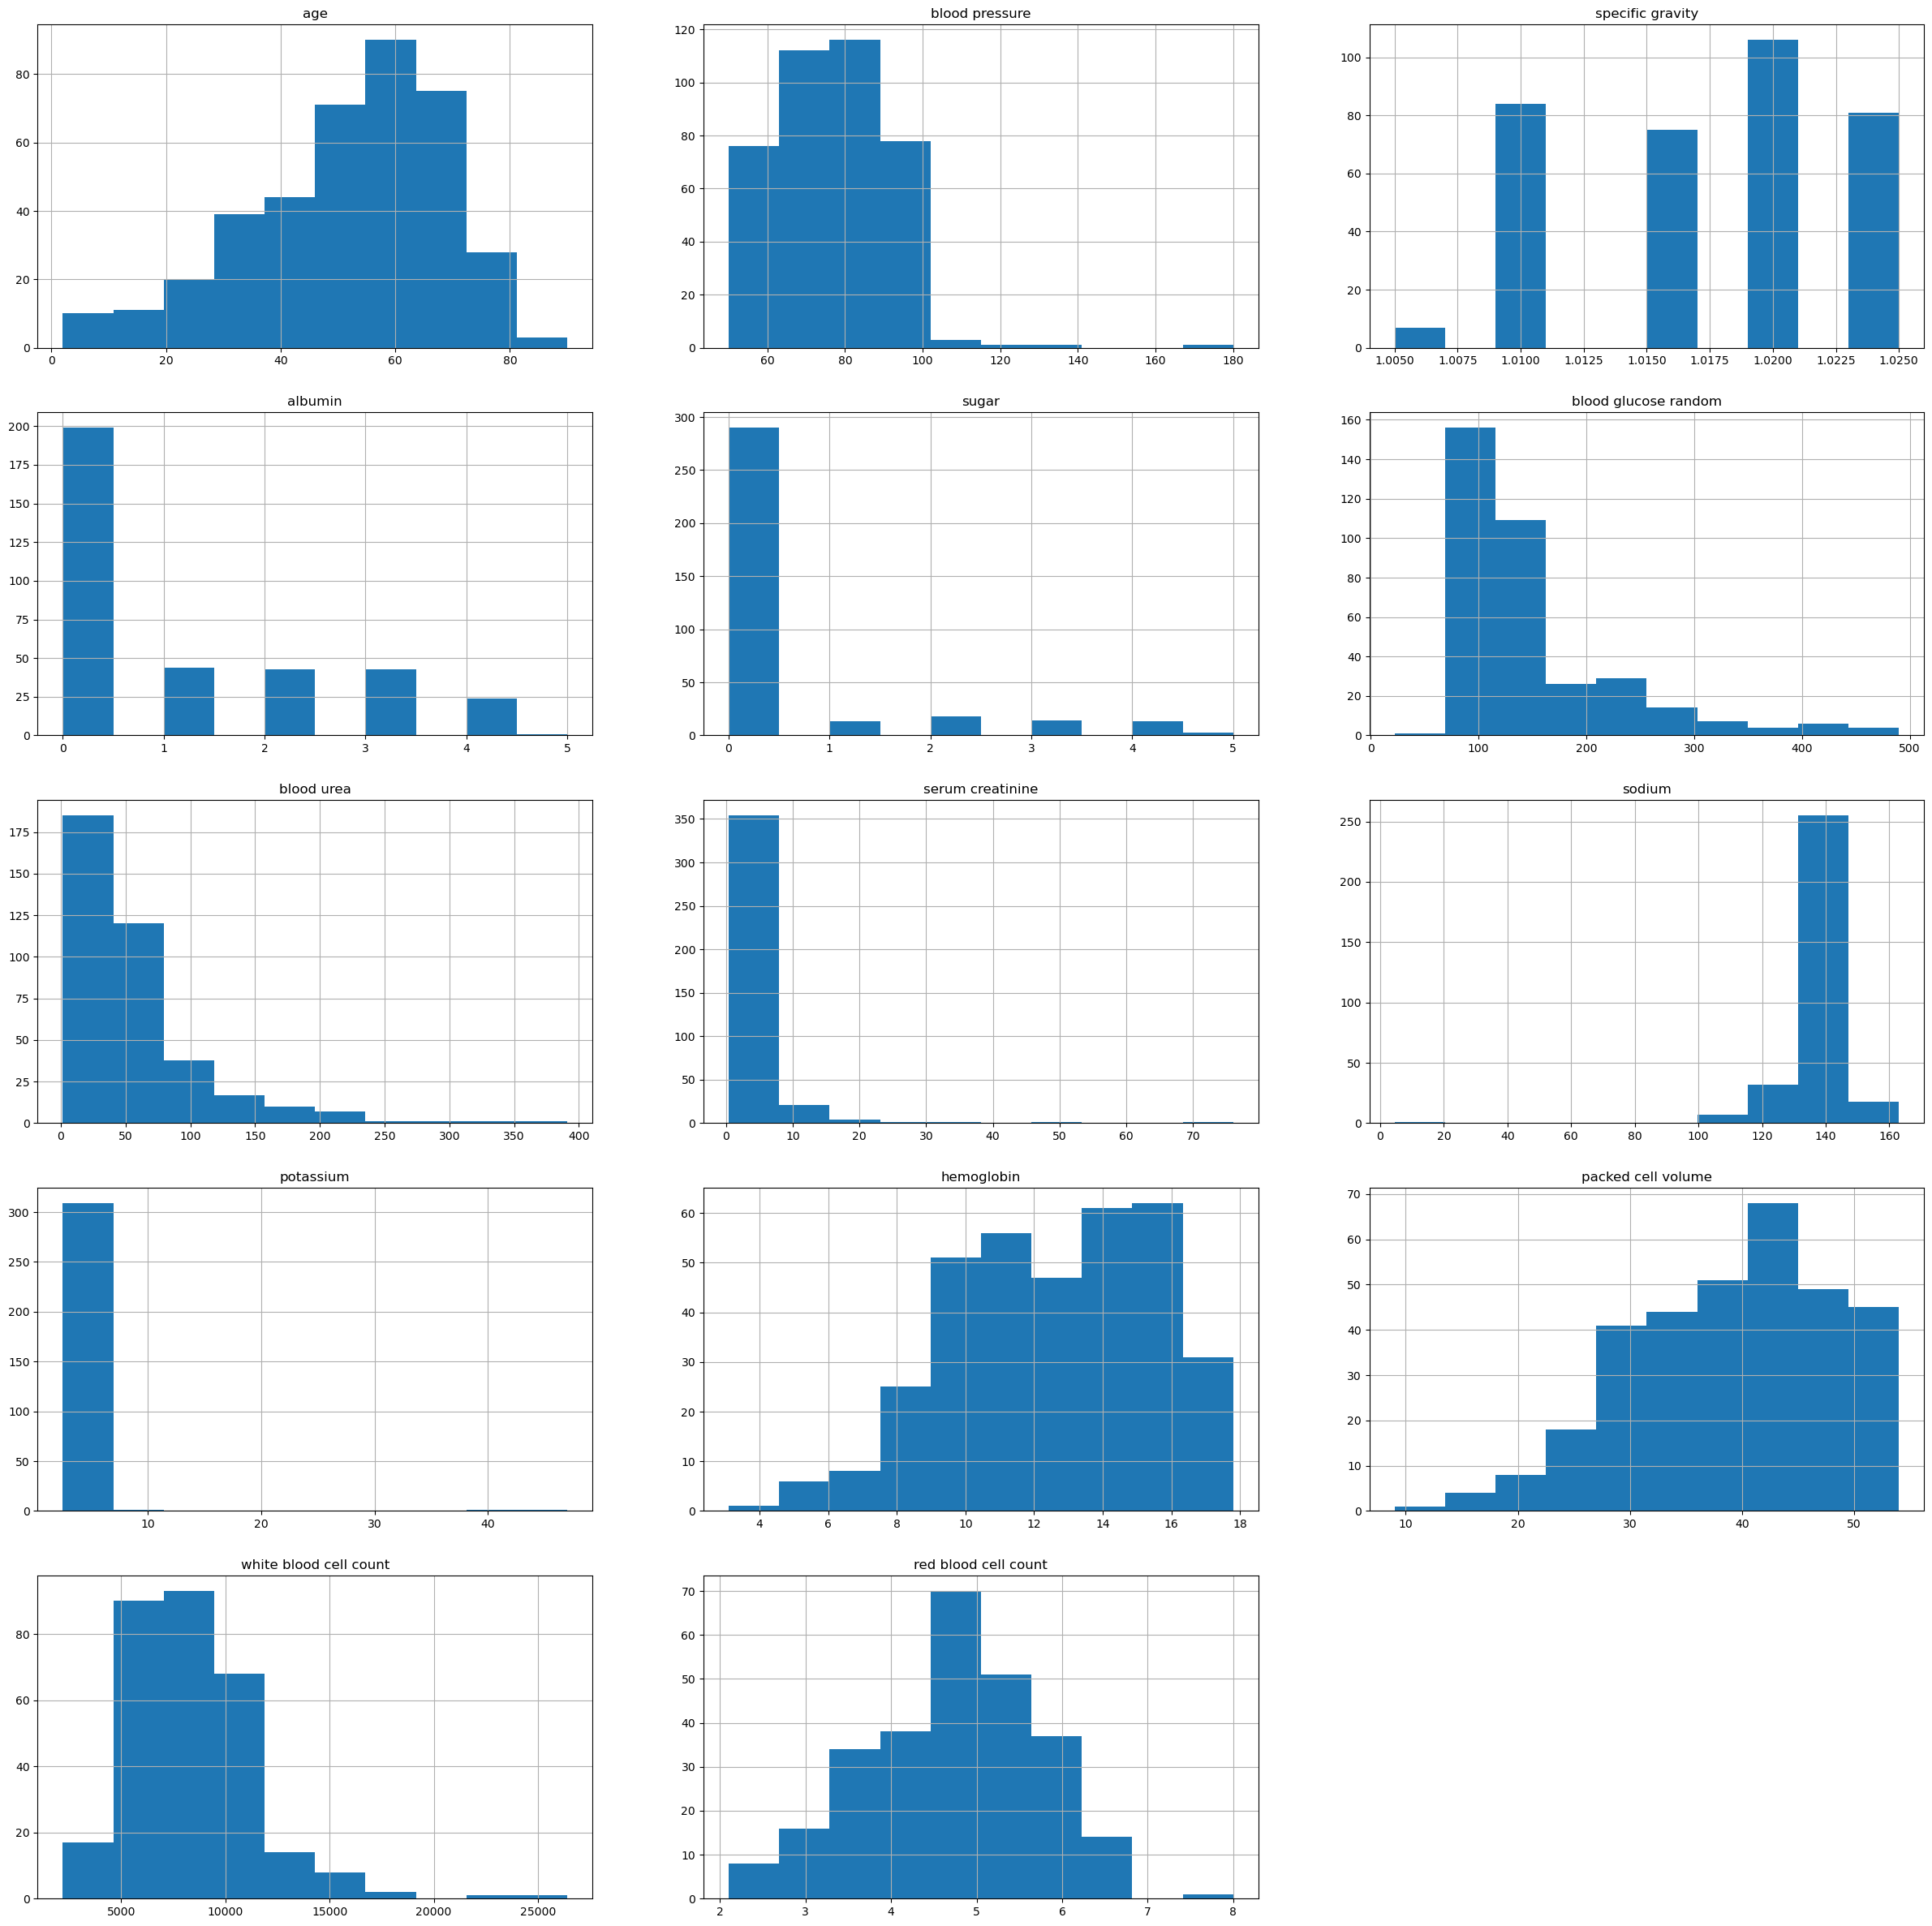

In [26]:
# Numerical features
plt.figure(figsize=(30,30))
for i,feature in enumerate(num_cols):
    plt.subplot(5,3,i+1)
    df_data[feature].hist()
    plt.title(feature)

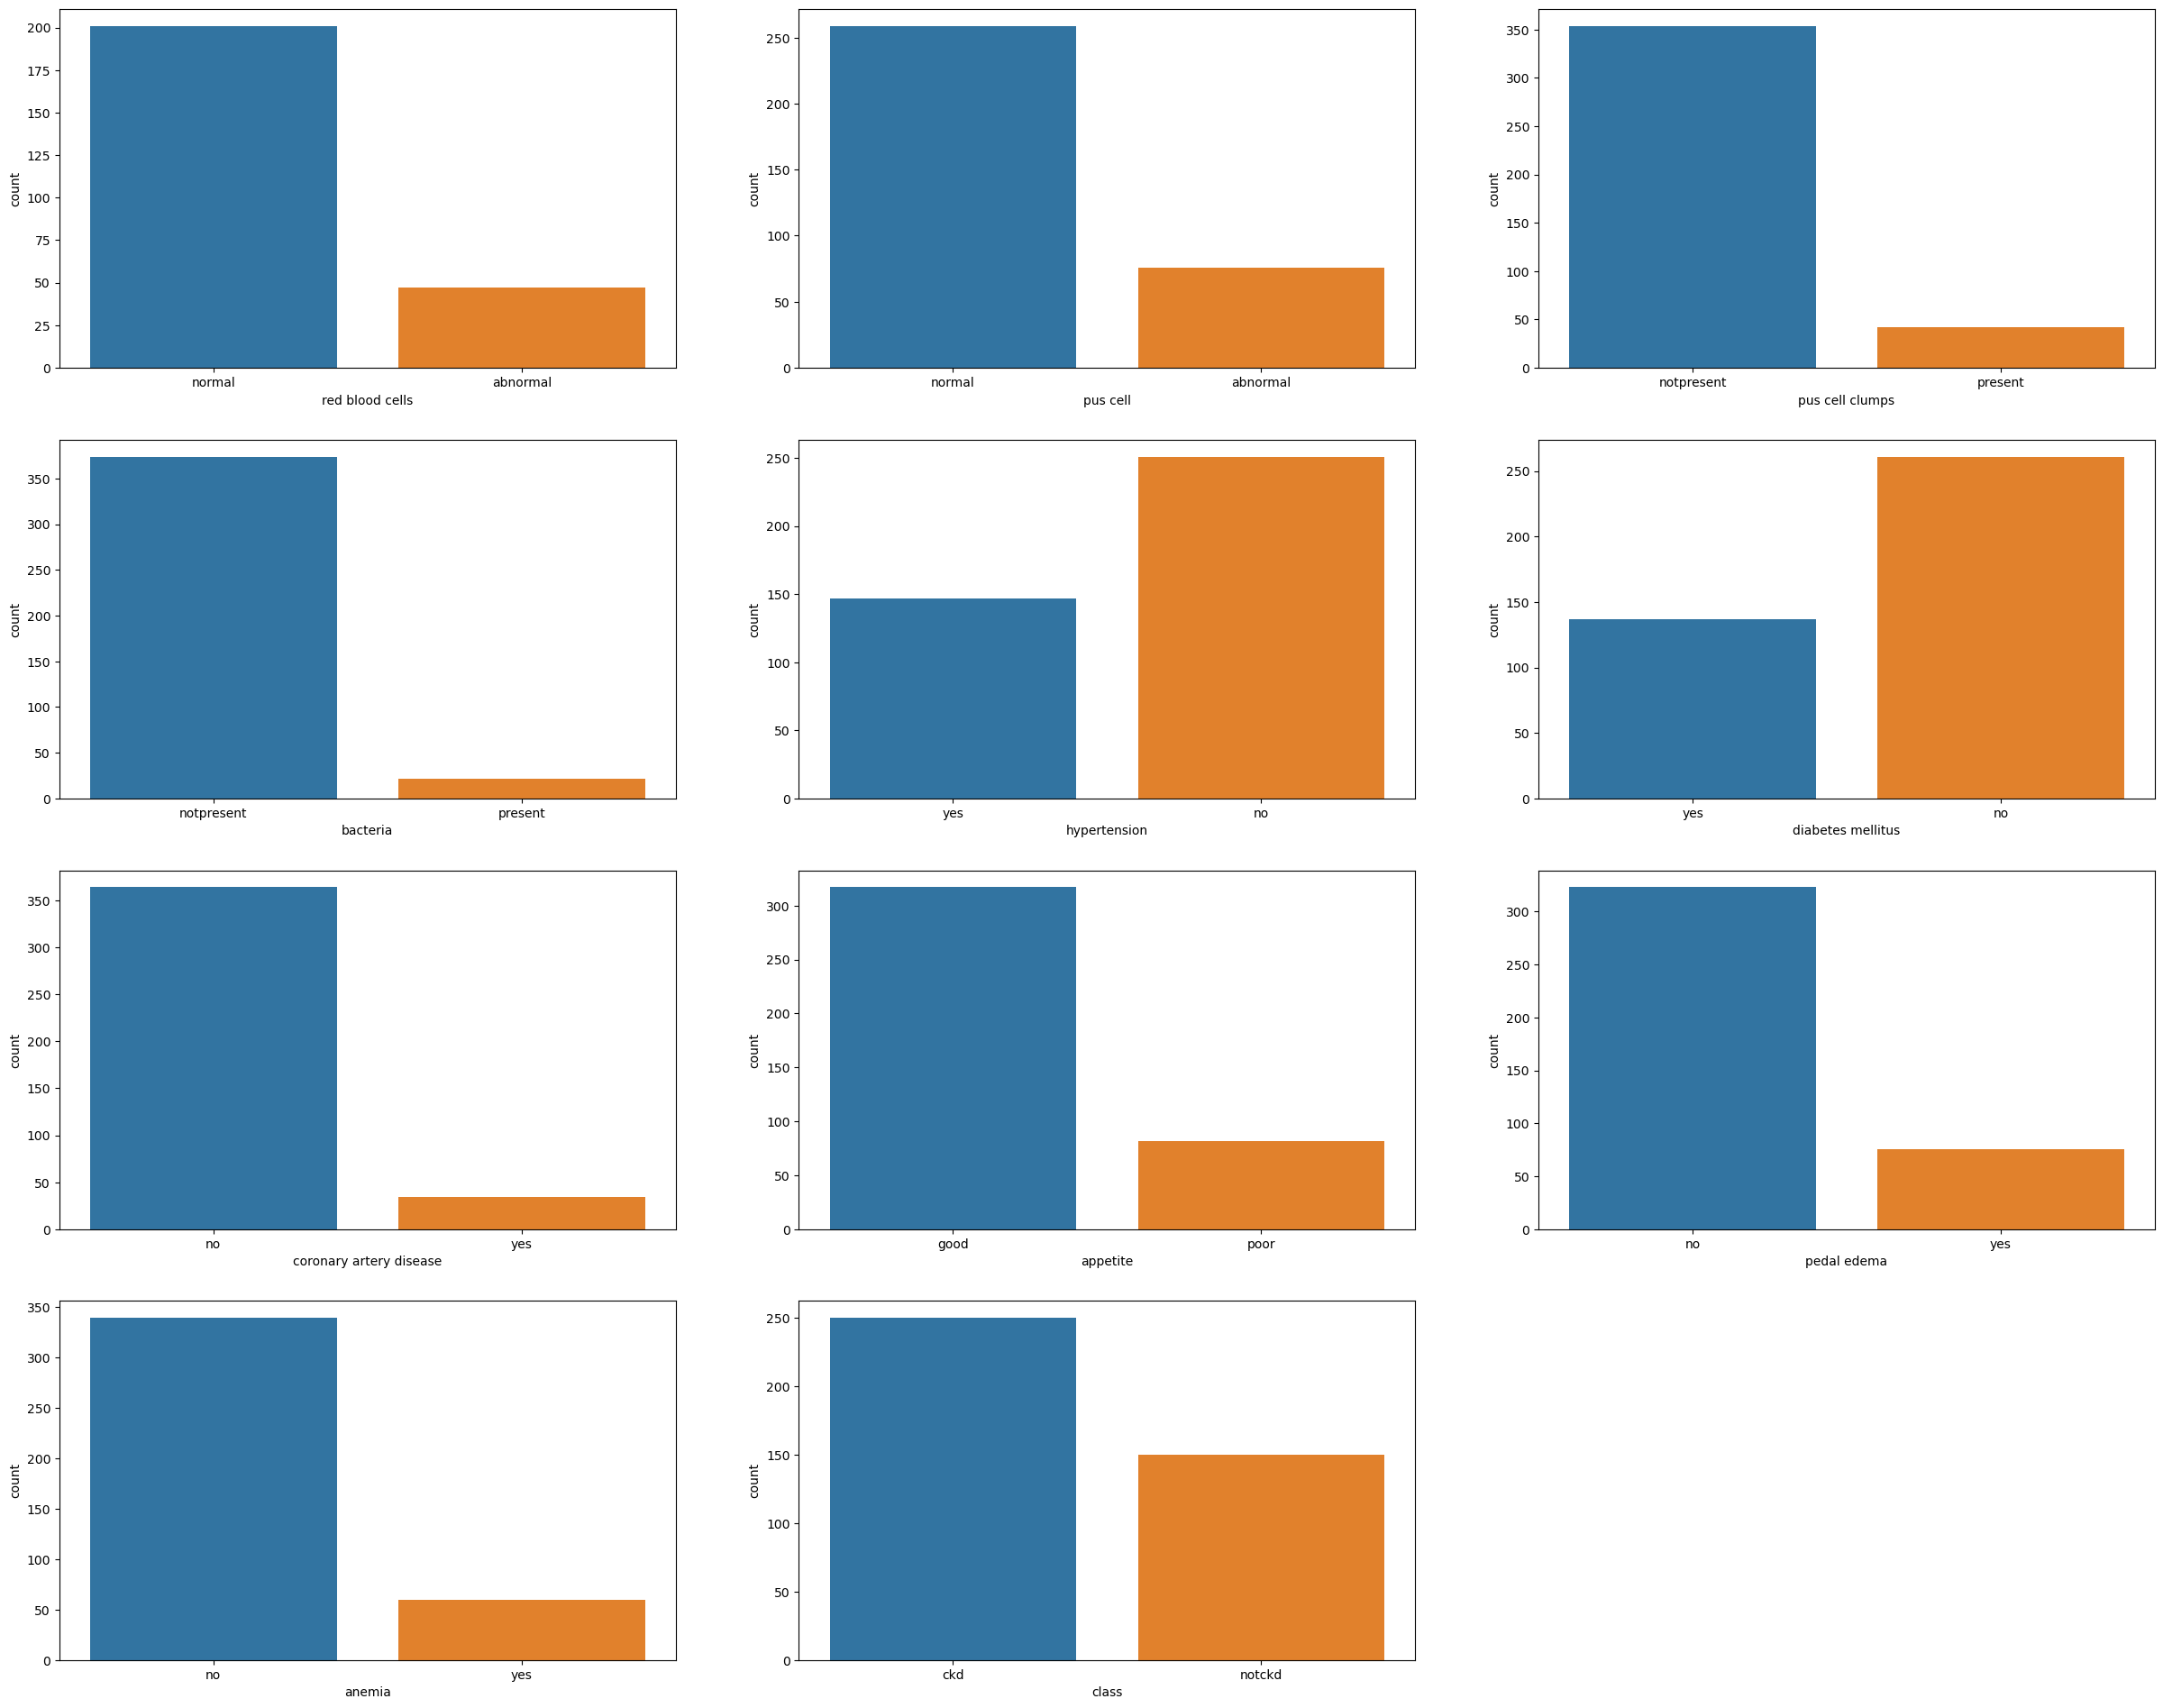

In [27]:
# Categorical features
plt.figure(figsize=(30,30))
for i,feature in enumerate(cat_cols):
    plt.subplot(5,3,i+1)
    sns.countplot(x=df_data[feature])

<AxesSubplot:>

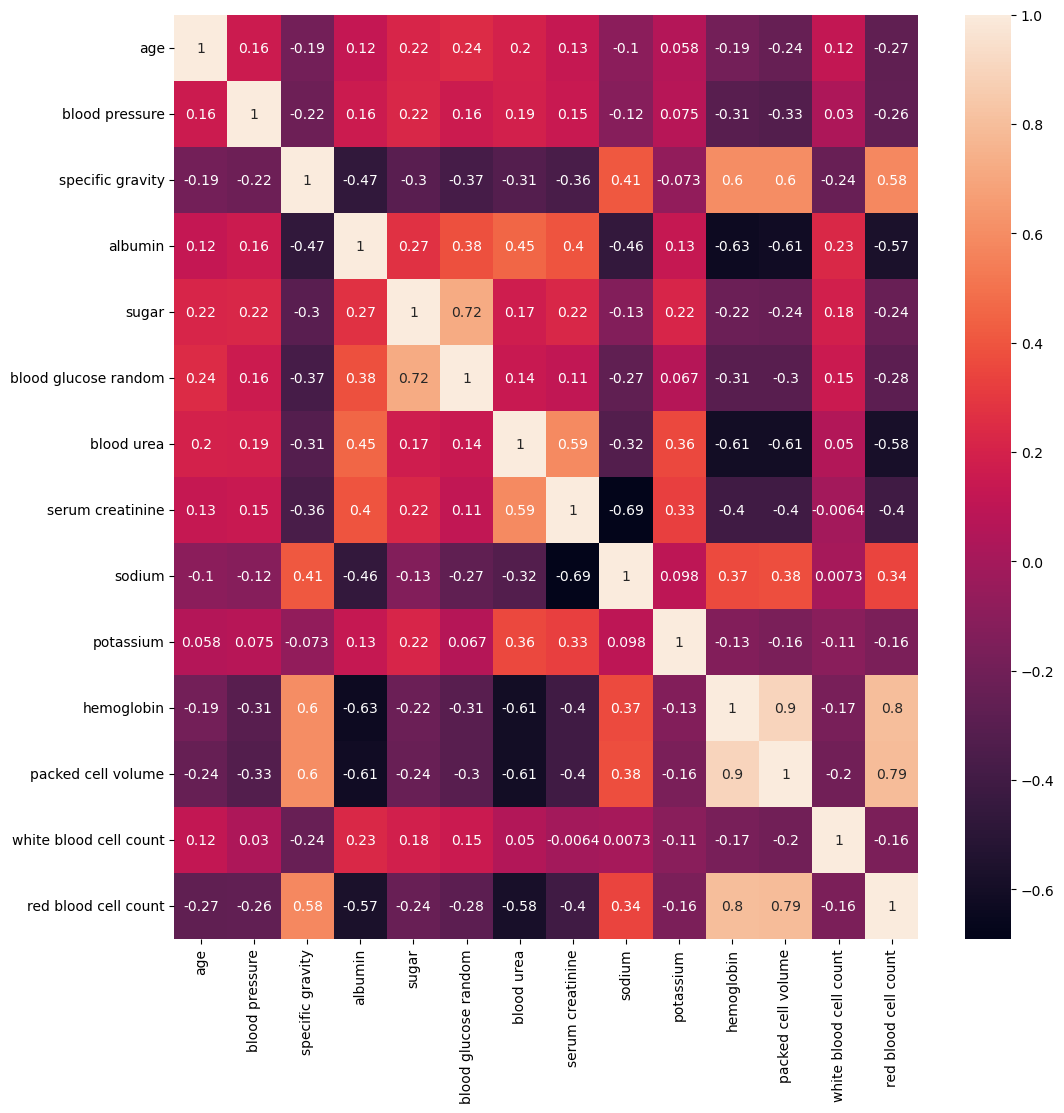

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(df_data.corr(), annot=True)

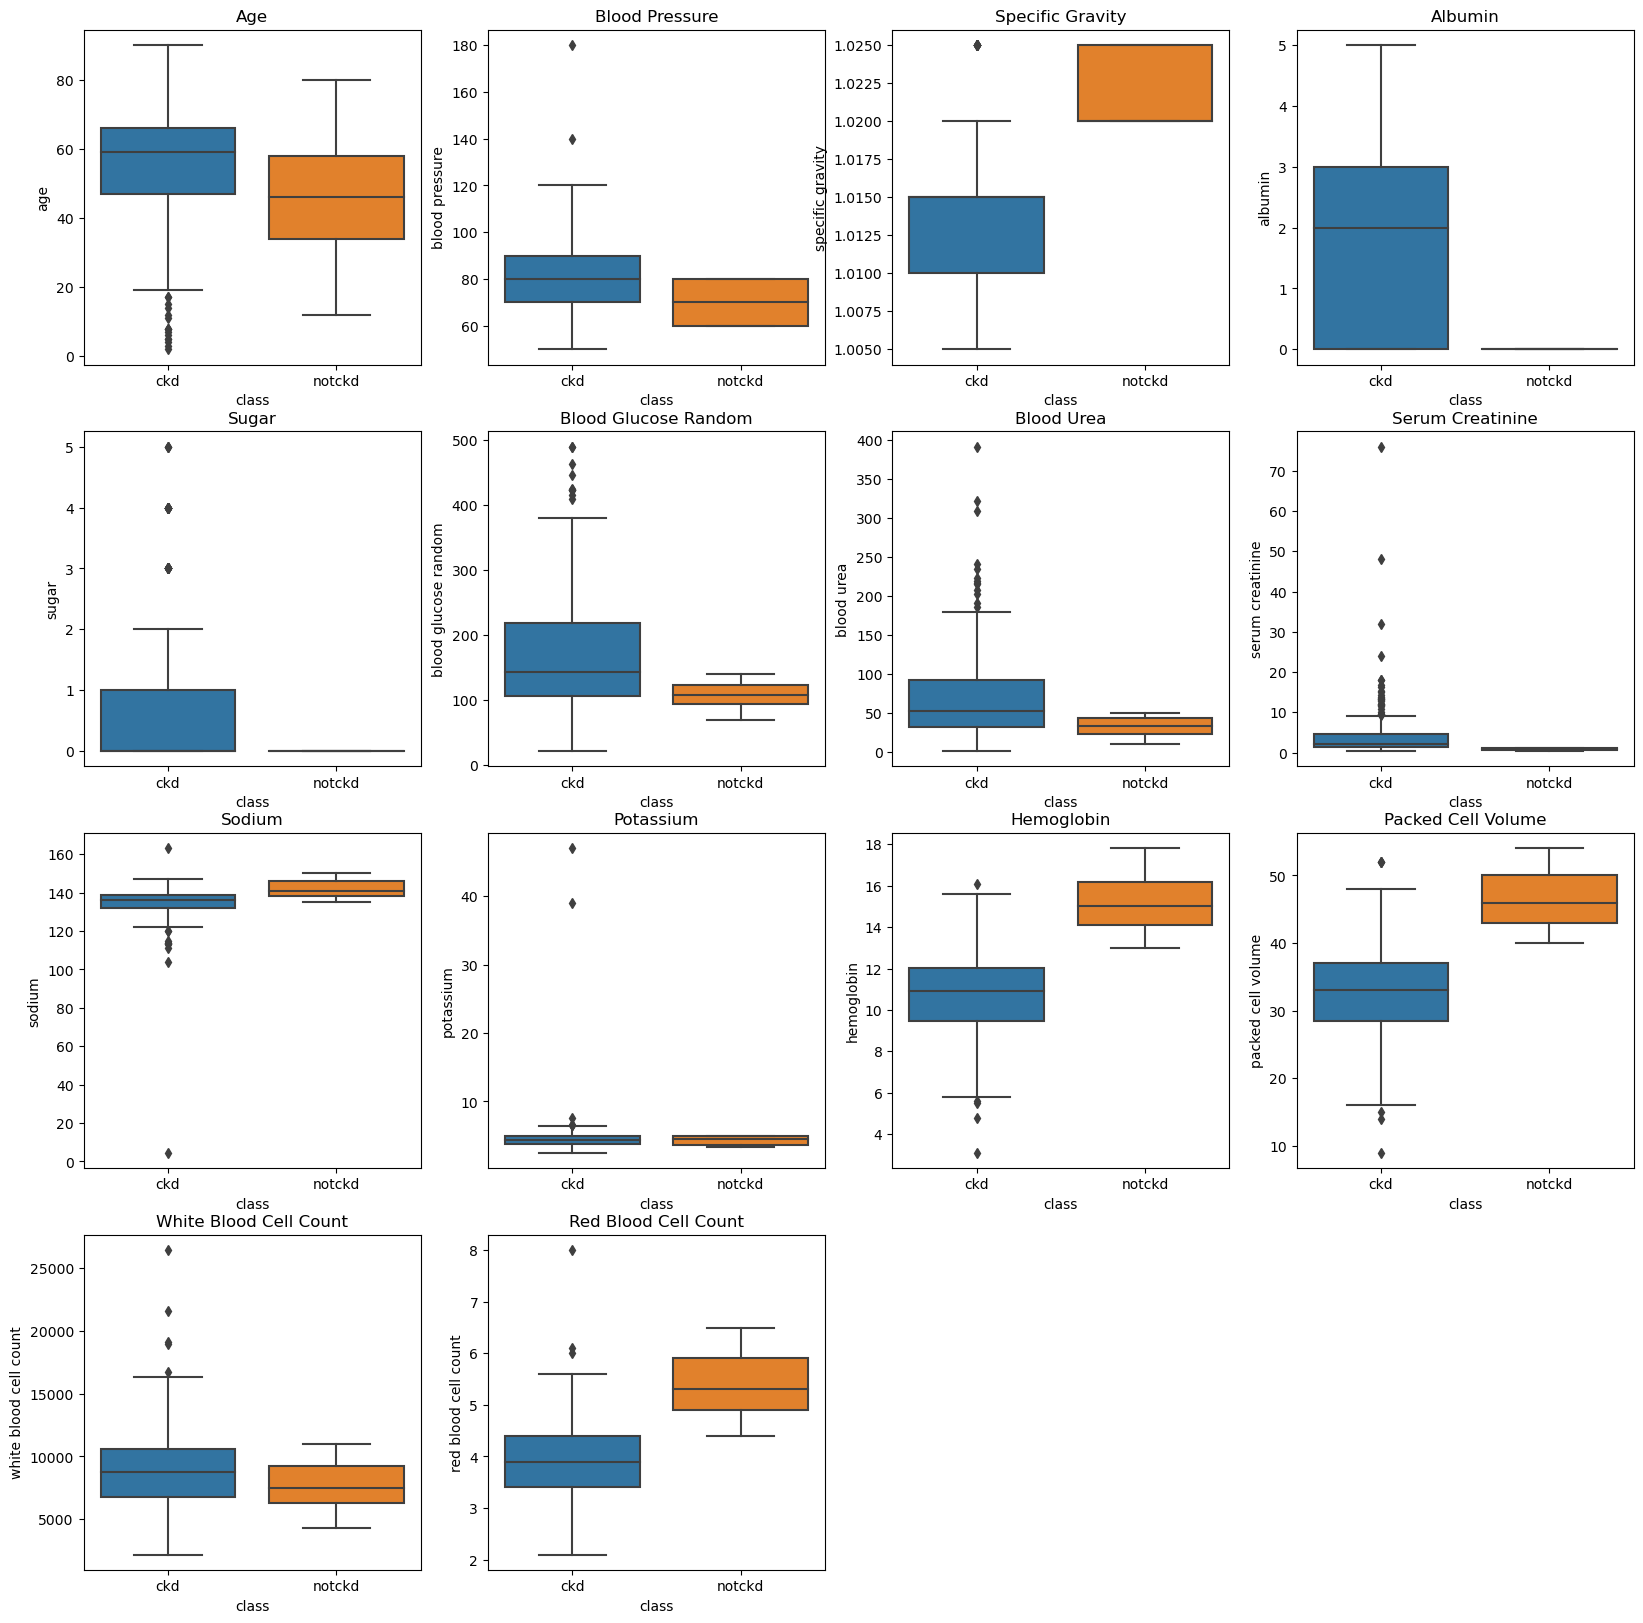

In [29]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(num_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(x=df_data['class'],y=df_data[feature])
    plt.title(feature.title())

## Dealing with missing values

In [30]:
# Detecting missing values
df_data.isnull().sum()

age                          9
blood pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed cell volume          71
white blood cell count     106
red blood cell count       131
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [31]:
# Replace NA values with median for numerical features
for i in num_cols:
    df_data[i].fillna(df_data[i].median(),inplace=True)

In [32]:
df_data.isnull().sum()

age                          0
blood pressure               0
specific gravity             0
albumin                      0
sugar                        0
red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
blood glucose random         0
blood urea                   0
serum creatinine             0
sodium                       0
potassium                    0
hemoglobin                   0
packed cell volume           0
white blood cell count       0
red blood cell count         0
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [33]:
# Replace NA values with random values for catergorical features with great number of missing values
for feature in ['red blood cells', 'pus cell']:
    random_sample = df_data[feature].dropna().sample(df_data[feature].isnull().sum())
    random_sample.index = df_data[df_data[feature].isnull()].index
    df_data.loc[df_data[feature].isnull(), feature] = random_sample

In [34]:
# Verification
df_data.isnull().sum()

age                        0
blood pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
pus cell                   0
pus cell clumps            4
bacteria                   4
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed cell volume         0
white blood cell count     0
red blood cell count       0
hypertension               2
diabetes mellitus          2
coronary artery disease    2
appetite                   1
pedal edema                1
anemia                     1
class                      0
dtype: int64

In [35]:
# Replace NA values with mode values for catergorical features with less number of missing values
for feature in cat_cols:
    mode=df_data[feature].mode()[0]
    df_data[feature]=df_data[feature].fillna(mode)

In [36]:
# Verification
df_data.isnull().sum().any()

False

## Encoding

In [37]:
for col in cat_cols:
    print(f'{col} has {df_data[col].nunique()} categories')

red blood cells has 2 categories
pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
hypertension has 2 categories
diabetes mellitus has 2 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


In [38]:
# Apply Label-Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_cols:
    df_data[col]=le.fit_transform(df_data[col])

In [39]:
# Verification
df_data.dtypes

age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells              int32
pus cell                     int32
pus cell clumps              int32
bacteria                     int32
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
hypertension                 int32
diabetes mellitus            int32
coronary artery disease      int32
appetite                     int32
pedal edema                  int32
anemia                       int32
class                        int32
dtype: object

## Feature Selection

In [40]:
# Importing libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [44]:
# Separating target column from features
X = df_data[[col for col in df_data.columns if col!='class']]
y = df_data['class']

In [45]:
# Calculate scores
imp_features=SelectKBest(score_func=chi2,k=20).fit(X,y)


In [46]:
# Display columns with scores
features_rank = pd.concat([
    pd.DataFrame(X.columns),
    pd.DataFrame(imp_features.scores_,columns=['Score'])
    ], axis=1)
features_rank.columns = ['feature', 'score']
features_rank.nlargest(10, 'score')

,feature,score
16,white blood cell count,9701.050391
10,blood urea,2343.097145
9,blood glucose random,2241.651289
11,serum creatinine,357.792101
15,packed cell volume,308.181415
3,albumin,216.000000
14,hemoglobin,123.856342
0,age,115.859940
4,sugar,94.800000
18,hypertension,88.200000


In [330]:
# Selecting only best 10 features
X_best = df_data[features_rank.nlargest(10, 'score')['feature'].values]
X_best.shape

(400, 10)

In [331]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_best,y,random_state=42,test_size=0.3)
X_train.shape
y_train.value_counts() # Check imbalance

0    174
1    106
Name: class, dtype: int64

In [332]:
# CFS
from scipy.stats import pointbiserialr
from math import sqrt

def getMerit(subset, label):
    k = len(subset)

    # average feature-class correlation
    rcf_all = []
    for feature in subset:
        coeff = pointbiserialr( df_data[label], df_data[feature] )
        rcf_all.append( abs( coeff.correlation ) )
    rcf = np.mean( rcf_all )

    # average feature-feature correlation
    corr = df_data[subset].corr()
    corr.values[np.tril_indices_from(corr.values)] = np.nan
    corr = abs(corr)
    rff = corr.unstack().mean()

    return (k * rcf) / sqrt(k + k * (k-1) * rff)

In [333]:
# Find best feature
best_value = -1
best_feature = ''
for feature in features:
    coeff = pointbiserialr( df_data['class'], df_data[feature] )
    abs_coeff = abs( coeff.correlation )
    if abs_coeff > best_value:
        best_value = abs_coeff
        best_feature = feature

print("Feature %s with merit %.4f"%(best_feature, best_value))

Feature hemoglobin with merit 0.7264


In [334]:
# Define datastructure and initialize for holding values
class PriorityQueue:
    def  __init__(self):
        self.queue = []

    def isEmpty(self):
        return len(self.queue) == 0
    
    def push(self, item, priority):
        """
        item already in priority queue with smaller priority:
        -> update its priority
        item already in priority queue with higher priority:
        -> do nothing
        if item not in priority queue:
        -> push it
        """
        for index, (i, p) in enumerate(self.queue):
            if (set(i) == set(item)):
                if (p >= priority):
                    break
                del self.queue[index]
                self.queue.append( (item, priority) )
                break
        else:
            self.queue.append( (item, priority) )
        
    def pop(self):
        # return item with highest priority and remove it from queue
        max_idx = 0
        for index, (i, p) in enumerate(self.queue):
            if (self.queue[max_idx][1] < p):
                max_idx = index
        (item, priority) = self.queue[max_idx]
        del self.queue[max_idx]
        return (item, priority)

# initialize queue
queue = PriorityQueue()

# push first tuple (subset, merit)
queue.push([best_feature], best_value)

# list for visited nodes
visited = []

# counter for backtracks
n_backtrack = 0

# limit of backtracks
max_backtrack = 5

In [360]:
# Fill the queue
# repeat until queue is empty
# or the maximum number of backtracks is reached
while not queue.isEmpty():
    # get element of queue with highest merit
    subset, priority = queue.pop()
    
    # check whether the priority of this subset
    # is higher than the current best subset
    if (priority < best_value):
        n_backtrack += 1
    else:
        best_value = priority
        best_subset = subset

    # goal condition
    if (n_backtrack == max_backtrack):
        break
    
    # iterate through all features and look of one can
    # increase the merit
    for feature in features:
        temp_subset = subset + [feature]
        
        # check if this subset has already been evaluated
        for node in visited:
            if (set(node) == set(temp_subset)):
                break
        # if not, ...
        else:
            # ... mark it as visited
            visited.append( temp_subset )
            # ... compute merit
            merit = getMerit(temp_subset, 'class')
            # and push it to the queue
            queue.push(temp_subset, merit)
else:
    print(f"best features: {subset} with priority {priority}")

best features: ['hemoglobin', 'blood urea', 'serum creatinine'] with priority 0.5695130975120687


In [336]:
# Validation
from sklearn.model_selection import cross_val_score
from sklearn import svm
import time

# predictors
X = df_data[features].to_numpy()
# target
Y = df_data['class'].to_numpy()

# get timing
t0 = time.time()

# run SVM with 10-fold cross validation
svc = svm.SVC(kernel='rbf', C=100, gamma=0.01, random_state=42)
scores = cross_val_score(svc, X, Y, cv=10)
best_score = np.mean( scores )

print("Score: %.2f%% (Time: %.4f s)"%(best_score*100, time.time() - t0))

# predictors
X = df_data[best_subset].to_numpy()

# get timing
t0 = time.time()

# run SVM with 10-fold cross validation
svc = svm.SVC(kernel='rbf', C=100, gamma=0.01, random_state=42)
scores_subset = cross_val_score(svc, X, Y, cv=10)
best_score = np.mean( scores_subset )

print("Score: %.2f%% (Time: %.4f s)"%(best_score*100, time.time() - t0))

Score: 63.75% (Time: 0.0859 s)
Score: 95.00% (Time: 0.0375 s)


In [337]:
# RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

# Init the transformer
#rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=10)
# OR
rfe = RFE(estimator=LogisticRegression(solver='lbfgs', max_iter=1000), n_features_to_select=10, step=10, verbose=5)


# Fit to the training data
_ = rfe.fit(X_train, y_train)
rfe_features = X_train.loc[:, rfe.support_].columns.tolist()

In [338]:
#print selected features
from operator import itemgetter
features = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 white blood cell count
1 blood urea
1 blood glucose random
1 serum creatinine
1 packed cell volume
1 albumin
1 hemoglobin
1 age
1 sugar
1 hypertension


## Choosing parameters with GridSearchCV with 10-fold cross validations

In [339]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier

def auc_scorer(clf, X, y, model): # Helper function to plot the ROC curve
    if model=='RF':
        fpr, tpr, _ = roc_curve(y, clf.predict_proba(X)[:,1])
    elif model=='SVM':
        fpr, tpr, _ = roc_curve(y, clf.decision_function(X))
    roc_auc = auc(fpr, tpr)

    plt.figure()    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve from '+model+' model (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr,roc_auc

Detailed classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Confusion Matrix:
[[76  0]
 [ 0 44]]


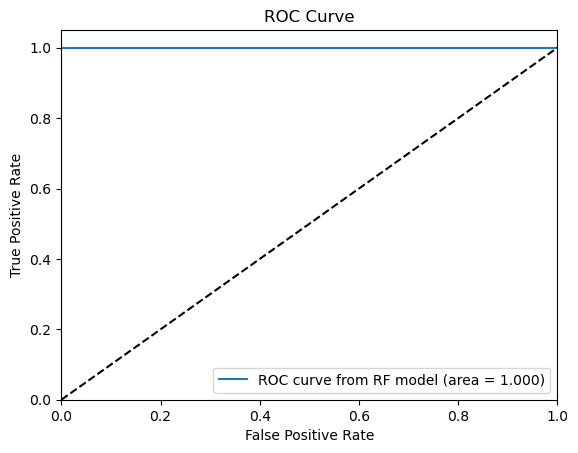

Best parameters:
{'class_weight': {0: 0.33, 1: 0.67}, 'max_depth': 5, 'n_estimators': 9, 'random_state': 42}


In [340]:
tuned_parameters = [{'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],'random_state':[42]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10,scoring='f1')
clf.fit(X_train, y_train)

print("Detailed classification report:")
y_true, lr_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(confusion)

# Determine the false positive and true positive rates
fpr,tpr,roc_auc = auc_scorer(clf, X_test, y_test, 'RF')

print('Best parameters:')
print(clf.best_params_)
clf_best = clf.best_estimator_

Text(0.5, 1.0, 'Feature Importance')

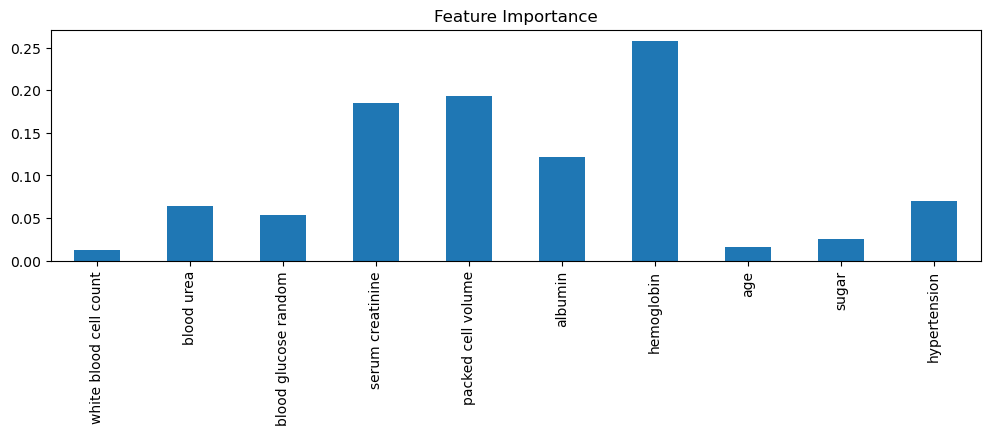

In [341]:
plt.figure(figsize=(12,3))
features = X_test.columns.values.tolist()
importance = clf_best.feature_importances_.tolist()
feature_series = pd.Series(data=importance,index=features)
feature_series.plot.bar()
plt.title('Feature Importance')

## XGBoost Classifier

In [342]:
# Import
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [343]:
# Initialization
params={'learning-rate':[0,0.5,0.20,0.25],
        'max_depth':[5,8,10],
       'min_child_weight':[1,3,5,7],
       'gamma':[0.0,0.1,0.2,0.4],
       'colsample_bytree':[0.3,0.4,0.7]}
classifier=XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[22:26:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learning-rate" } are not used.



RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                

In [344]:
# Check best model
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning-rate=0,
              learning_rate=0.300000012, max_bin=256, max_cat_threshold=64,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=5, max_leaves=0,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto', ...)

In [345]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 5,
 'learning-rate': 0,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [346]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='', learning_rate=0.300000012, max_delta_step=0,
              max_depth=5, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [347]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy='depthwise', importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=8, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [348]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [349]:
confusion_matrix(y_test,y_pred)

array([[75,  1],
       [ 0, 44]])

In [350]:
# Evaluation
accuracy_score(y_test,y_pred)

0.9916666666666667

## RandomForest Classifier

In [351]:
model = RandomForestClassifier(n_estimators = 20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [352]:
confusion_matrix(y_test, model.predict(X_test))

array([[76,  0],
       [ 1, 43]])

In [353]:
# Evaluation
print(f"Accuracy is {round(accuracy_score(y_test, model.predict(X_test))*100, 2)}%")

Accuracy is 99.17%
